**EXP - 1 (To explore the descriptive statistics on the given dataset)**

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0
Min: 4.3
Max: 7.9
Range: 3.6000000000000005
Quartiles:
 0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64


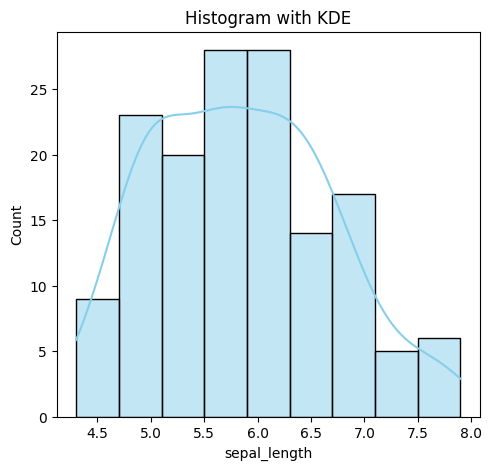

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")

col = 'sepal_length'

print("Mean:", df[col].mean())
print("Median:", df[col].median())
print("Mode:", df[col].mode()[0])
print("Min:", df[col].min())
print("Max:", df[col].max())
print("Range:", df[col].max() - df[col].min())
print("Quartiles:\n", df[col].quantile([0.25, 0.5, 0.75]))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True, color='skyblue')
plt.title("Histogram with KDE")
plt.show()

**EXP - 2 (To apply Data Cleaning techniques)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
print("Missing values:\n", df.isnull().sum())

# 2. Drop rows with missing values
df = df.dropna()

# 3. Remove duplicates
df = df.drop_duplicates()

# 4. Convert column names to lowercase (optional)
df.columns = df.columns.str.lower()

# 5. Convert data types if needed
df['sepal_length'] = df['sepal_length'].astype(float)

# 6. Replace wrong/corrupt values (example)
df['species'] = df['species'].replace('setosaa', 'setosa')

# Final cleaned data preview
print(df.head())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**EXP - 3 (To explore the inferential statistics t-test on the given dataset)**

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns

df = sns.load_dataset("iris")
df.dropna(inplace=True)
print(df.head())

# Filter data for two species (example: Setosa vs Versicolor)
setosa = df[df['species'] == 'setosa']['sepal_length']
versicolor = df[df['species'] == 'versicolor']['sepal_length']

t_stat, p_value = stats.ttest_ind(setosa, versicolor)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
T-statistic: -10.52098626754911
P-value: 8.985235037487079e-18
The difference is statistically significant.


**EXP - 4 (perform Data Visualization techniques)**

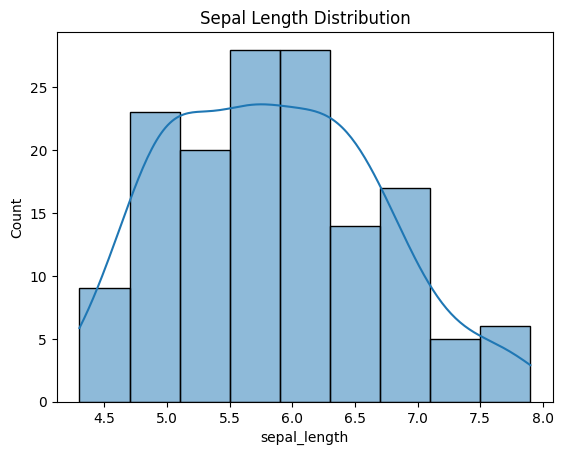

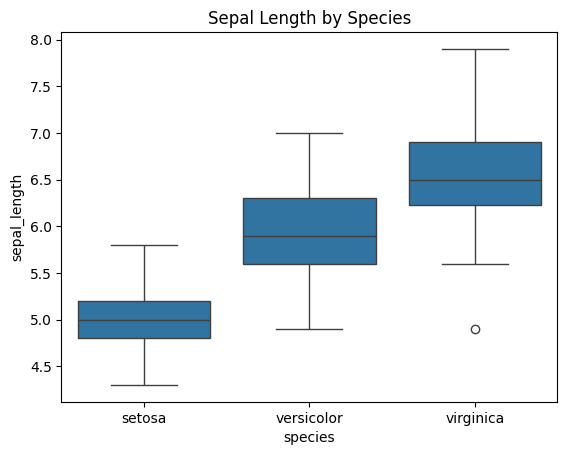

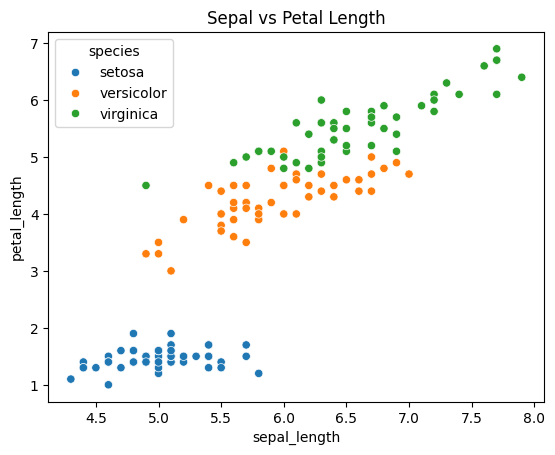

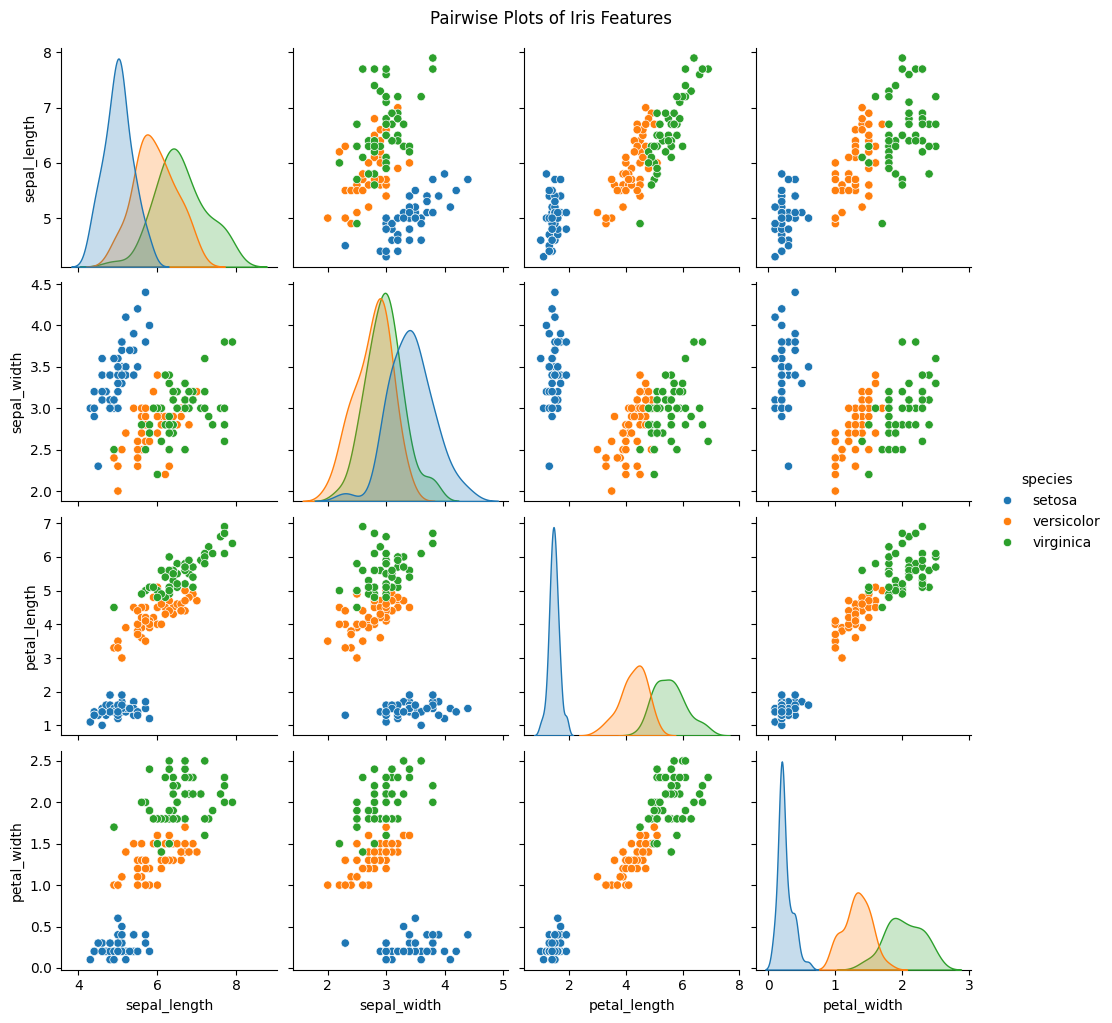

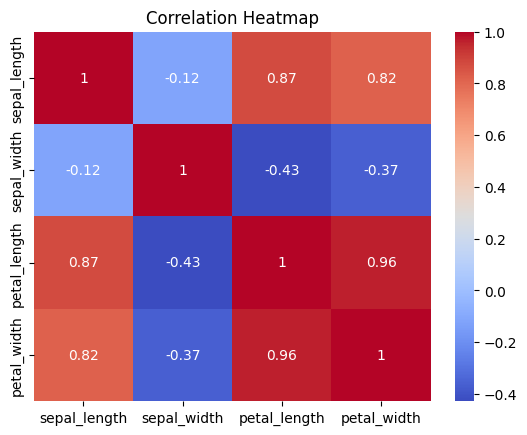

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("iris")

# 1. Histogram (distribution of sepal length)
sns.histplot(df['sepal_length'], kde=True)
plt.title("Sepal Length Distribution")
plt.show()

# 2. Boxplot (to see outliers and quartiles)
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title("Sepal Length by Species")
plt.show()

# 3. Scatterplot (sepal vs petal length)
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title("Sepal vs Petal Length")
plt.show()

# 4. Pairplot (all pairwise scatterplots with KDE)
sns.pairplot(df, hue='species')
plt.suptitle("Pairwise Plots of Iris Features", y=1.02)
plt.show()

# 5. Correlation Heatmap
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**EXP - 5 (To implement Linear Regression and evaluate the performance evaluation metrics)**

Mean Squared Error (MSE): 0.7035672420306047
Mean Absolute Error (MAE): 0.6800382348992978
R² Score: -0.01926874931997946


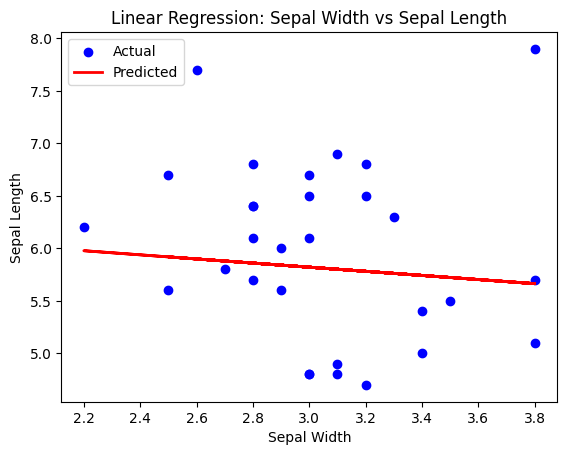

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")

# Use sepal_width to predict sepal_length
X = df[['sepal_width']]
y = df['sepal_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title("Linear Regression: Sepal Width vs Sepal Length")
plt.legend()
plt.show()

**EXP - 6 (To implement SMOTE techniques to generate synthetic data to solve the problem of class imbalance)**

Before SMOTE: Counter({'setosa': 30, 'versicolor': 10})
After SMOTE: Counter({'setosa': 30, 'versicolor': 30})


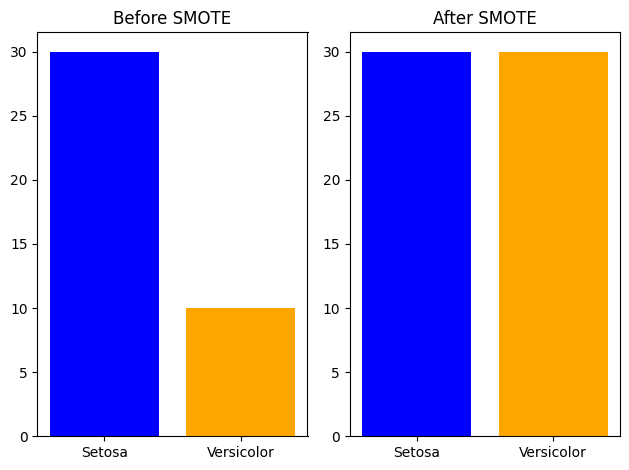

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")

# Artificially create imbalance
df = pd.concat([df[df['species'] == 'setosa'].sample(30), df[df['species'] == 'versicolor'].sample(10)])

X = df.drop('species', axis=1)
y = df['species']

print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))

plt.subplot(1, 2, 1)
plt.bar(['Setosa', 'Versicolor'], Counter(y).values(), color=['blue', 'orange'])
plt.title("Before SMOTE")

plt.subplot(1, 2, 2)
plt.bar(['Setosa', 'Versicolor'], Counter(y_resampled).values(), color=['blue', 'orange'])
plt.title("After SMOTE")

plt.tight_layout()
plt.show()

**EXP - 7 (To implement outlier detection using Density-Based method)**

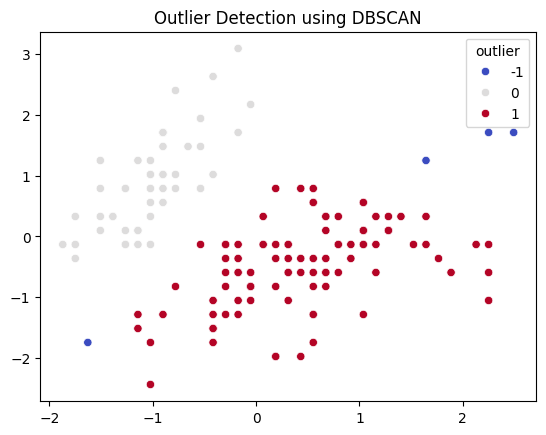

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("iris")
X = StandardScaler().fit_transform(df.drop("species", axis=1))

db = DBSCAN(eps=0.8, min_samples=5).fit(X)
df['outlier'] = db.labels_

sns.scatterplot(x=X[:,0], y=X[:,1], hue=df['outlier'], palette='coolwarm')
plt.title("Outlier Detection using DBSCAN")
plt.show()

**EXP - 8 (To implement Time series decomposition and moving averages method of trend)**

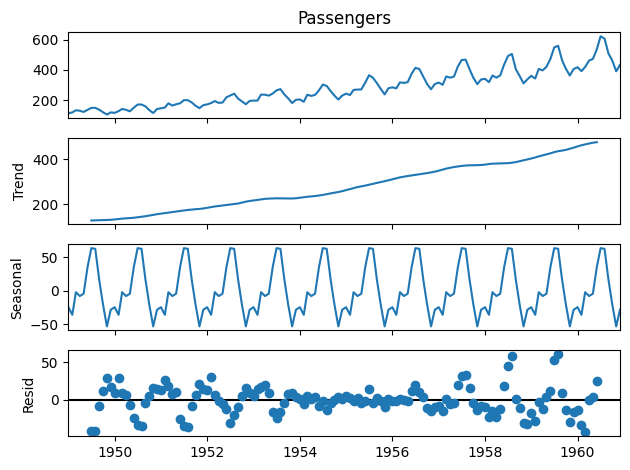

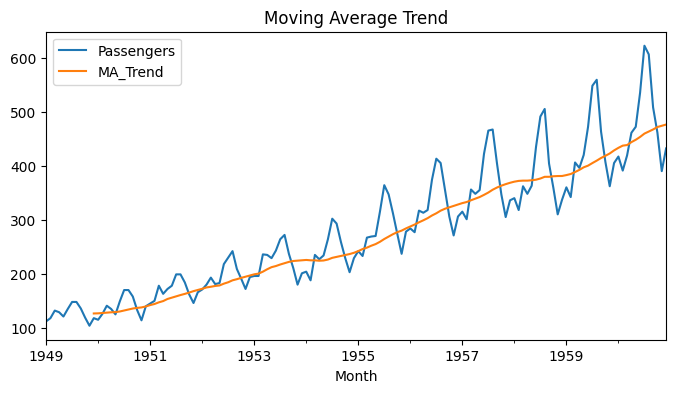

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

url = "/content/drive/MyDrive/Sem 8/ADS/Practical Exam/Datasets/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

decomp = seasonal_decompose(df['Passengers'], model='additive')
decomp.plot()
plt.tight_layout()
plt.show()

df['MA_Trend'] = df['Passengers'].rolling(window=12).mean()
df[['Passengers', 'MA_Trend']].plot(figsize=(8,4))
plt.title("Moving Average Trend")
plt.show()